In [62]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima

In [64]:
df = pd.read_csv('/content/Champaigne_Sales.csv')

In [65]:
df

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [66]:
df['Month'] = pd.to_datetime(df['Month'])

In [67]:
df

,Month,Champagne sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413


In [68]:
df.set_index('Month', inplace = True)

In [69]:
df

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<Axes: xlabel='Month', ylabel='Champagne sales'>

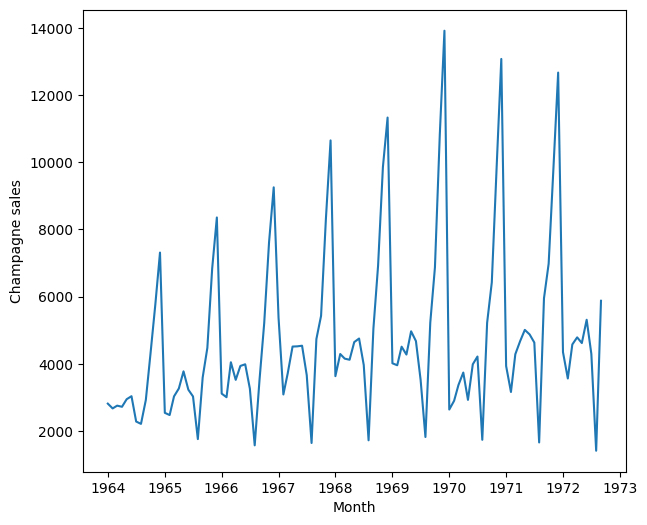

In [70]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x='Month', y= 'Champagne sales')

In [71]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

(alpha) determines the threshold for accepting or rejecting the null hypothesis is set to 0.05, indicating a 5% significance level. 

The should_diff() method is used to check whether differencing (a common technique to achieve stationarity) should be applied to the series based on the ADF test results. The method returns a boolean value (True or False) indicating whether differencing is recommended (True means differencing is suggested).

In [72]:
train = df[:85]
test = df[-20:]

In [73]:
train.tail()

,Champagne sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


<Axes: xlabel='Month'>

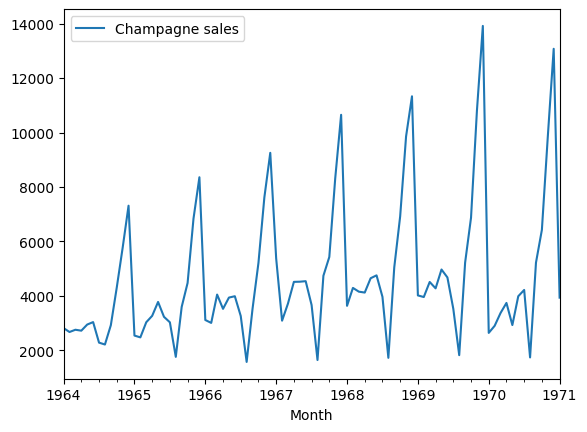

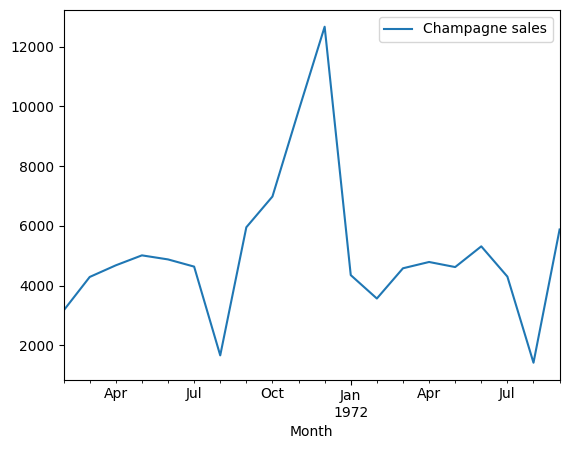

In [74]:
train.plot()
test.plot()


Text(0, 0.5, 'Sales')

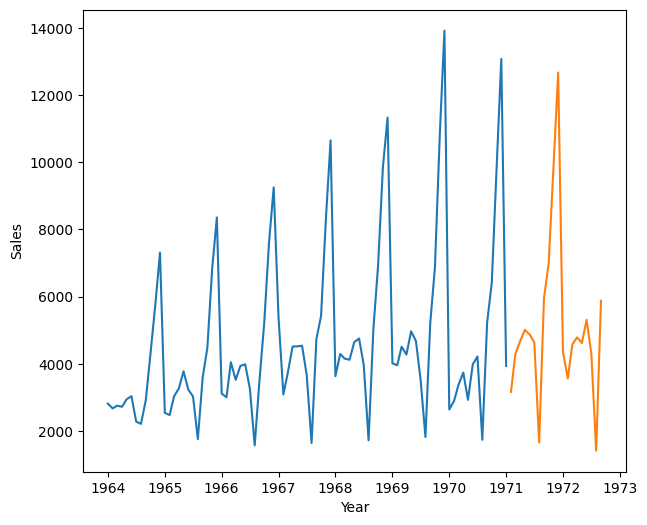

In [75]:
plt.figure(figsize=(7,6))
plt.plot(train)
plt.plot(test)
plt.xlabel('Year')
plt.ylabel('Sales')

In [76]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.32 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=1.47 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.49 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.14 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=1.35 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.639, Time=4.23 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=1.47 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [77]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Mon, 22 May 2023   AIC                           1174.564
Time:                                     20:33:29   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8411      0.152     -5.542      0.000      -1.139      -0.544
ma.L1          0.0512      0.167      0.307      0.759      -0.275       0.378
ma.L2         -0.8673      0.086    -10.133      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.865212
1971-03-01,3247.884572
1971-04-01,3592.635067
1971-05-01,2800.872612
1971-06-01,3842.009556
1971-07-01,4088.034305
1971-08-01,1596.396877
1971-09-01,5090.026311
1971-10-01,6284.085816


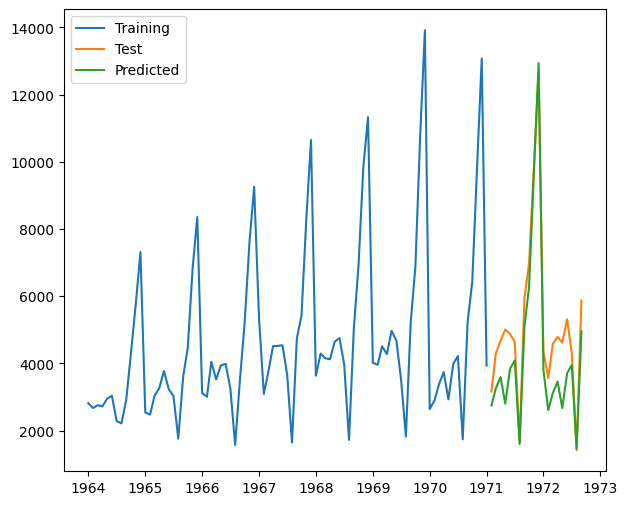

In [79]:
plt.figure(figsize=(7,6))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114969330335862